In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_feather("../data/merge/train_merge.feather")
df_test = pd.read_feather("../data/merge/test_merge.feather")

In [9]:
(df_test["TransactionDT_hhmmss"] // (60*60)).value_counts().sort_index()

0     30609
1     26426
2     22211
3     17280
4     12297
5      8020
6      4844
7      2965
8      2254
9      2354
10     3534
11     6530
12    11833
13    19484
14    25930
15    30575
16    33954
17    35204
18    35287
19    35755
20    35483
21    35498
22    34709
23    33655
Name: TransactionDT_hhmmss, dtype: int64

In [12]:
def ploting_cnt_amt(DataFile, Column, lim=2000):
    tmp = pd.crosstab(DataFile[Column], DataFile['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(16,14))    
    plt.suptitle(f'{Column} Distributions ', fontsize=24)
    
    plt.subplot(211)
    plot_1 = sns.countplot(x=Column,data=DataFile,order=list(tmp[Column].values))
    plot_1_2 = plot_1.twinx()
    plot_1_2 = sns.pointplot(x=Column, y='Fraud', data=tmp, order=list(tmp[Column].values),
                       color='black', legend=False)
    plot_1_2.set_ylim(0,tmp['Fraud'].max()*1.1)
    plot_1_2.set_ylabel("%Fraud Transactions", fontsize=16)
    plot_1.set_title(f"Most Frequent {Column} values and % Fraud Transactions", fontsize=20)
    plot_1.set_xlabel(f"{Column} Category Names", fontsize=16)
    plot_1.set_ylabel("Count", fontsize=17)
    plot_1.set_xticklabels(plot_1.get_xticklabels(),rotation=45)
    sizes = []
    for p in plot_1.patches:
        height = p.get_height()
        sizes.append(height)
        plot_1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    plot_1.set_ylim(0,max(sizes)*1.15)
    
    #########################################################################
    perc_amt = (DataFile.groupby(['isFraud',Column])['TransactionAmt'].sum() \
                / DataFile.groupby([Column])['TransactionAmt'].sum() * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    amt = DataFile.groupby([Column])['TransactionAmt'].sum().reset_index()
    perc_amt = perc_amt.fillna(0)
    plt.subplot(212)
    plot_2 = sns.barplot(x=Column, y='TransactionAmt', 
                       data=amt, 
                       order=list(tmp[Column].values))
    plot_2_2 = plot_2.twinx()
    plot_2_2 = sns.pointplot(x=Column, y='Fraud', data=perc_amt, 
                        order=list(tmp[Column].values),
                       color='black', legend=False, )
    plot_2_2.set_ylim(0,perc_amt['Fraud'].max()*1.1)
    plot_2_2.set_ylabel("%Fraud Total Amount", fontsize=16)
    plot_2.set_xticklabels(plot_2.get_xticklabels(),rotation=45)
    plot_2.set_title(f"{Column} by Transactions Total + %of total and %Fraud Transactions", fontsize=20)
    plot_2.set_xlabel(f"{Column} Category Names", fontsize=16)
    plot_2.set_ylabel("Transaction Total Amount(U$)", fontsize=16)
    plot_2.set_xticklabels(plot_2.get_xticklabels(),rotation=45)    
    
    for p in plot_2.patches:
        height = p.get_height()
        plot_2.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total_amt*100),
                ha="center",fontsize=12) 
        
    plt.subplots_adjust(hspace=.4, top = 0.9)
    plt.show()
    

In [13]:
ploting_cnt_amt(df_train, "diff_TransactionDay_D1")

/home/owner/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


NameError: name 'total' is not defined

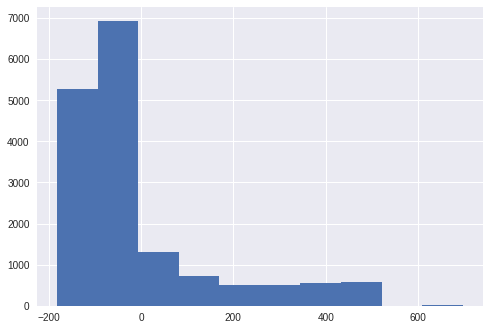

In [18]:
df_train.query("isFraud==1")["diff_TransactionDay_D1"].hist()
plt.show()

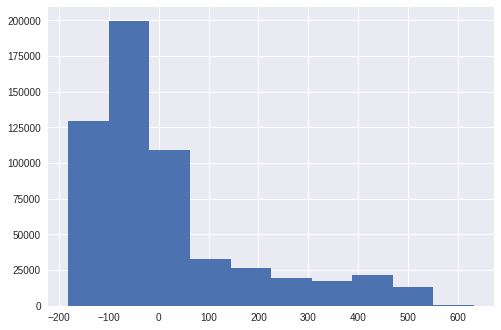

In [17]:
df_train.query("isFraud==0")["diff_TransactionDay_D1"].hist()
plt.show()

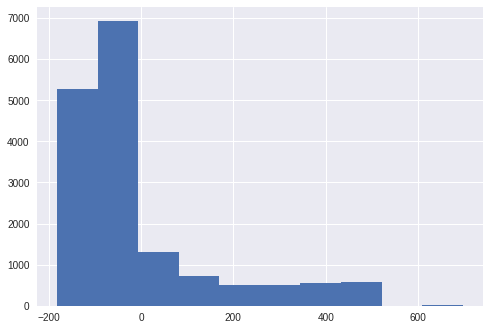

In [19]:
df_train.query("isFraud==1")["diff_TransactionDay_D15"].hist()
plt.show()

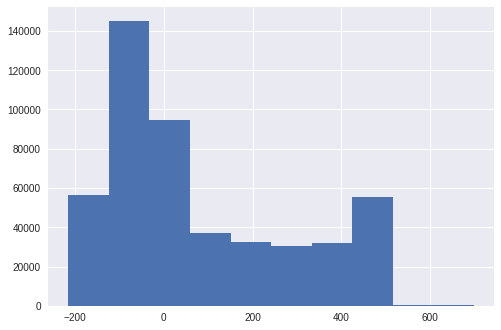

In [20]:
df_train.query("isFraud==0")["diff_TransactionDay_D15"].hist()
plt.show()

In [21]:
df_train.groupby(["TransactionWeekday", "ProductCD"])["TransactionID"].count()

TransactionWeekday  ProductCD
Friday              C            11802
                    H             4914
                    R             6426
                    S             1472
                    W            73888
Monday              C             9062
                    H             5835
                    R             5722
                    S             1870
                    W            62944
Saturday            C             9392
                    H             4766
                    R             4969
                    S             1169
                    W            59538
Sunday              C             8968
                    H             4981
                    R             4799
                    S             2116
                    W            49359
Thursday            C            10492
                    H             4130
                    R             5521
                    S             1527
                    W            6